### Test new default reading options of EBAS database

DATE: 11/3/2019

These are:

- datalevel = 2
- remove_invalid_flags = True
- keep_aux_vars = True (New feature!)

As example, use reading of Pallas scattering coefficients as they contain RH data.

In [1]:
import pyaerocom as pya
r = pya.io.ReadEbas()
data = r.read(['scatc550dryaer'], station_names=['Pallas*'])

Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.024 s


Reading file 1 of 19 (ReadEbas)
Reading file 2 of 19 (ReadEbas)
Reading file 3 of 19 (ReadEbas)
Reading file 4 of 19 (ReadEbas)
Reading file 5 of 19 (ReadEbas)
Reading file 6 of 19 (ReadEbas)
Reading file 7 of 19 (ReadEbas)
Reading file 8 of 19 (ReadEbas)
Reading file 9 of 19 (ReadEbas)
Reading file 10 of 19 (ReadEbas)
Reading file 11 of 19 (ReadEbas)
Reading file 12 of 19 (ReadEbas)
Reading file 13 of 19 (ReadEbas)
Reading file 14 of 19 (ReadEbas)
Reading file 15 of 19 (ReadEbas)
Reading file 16 of 19 (ReadEbas)
Reading file 17 of 19 (ReadEbas)
Reading file 18 of 19 (ReadEbas)
Reading file 19 of 19 (ReadEbas)


In [2]:
s0 = data.to_station_data('Pall*', 'scatc550aer', insert_nans=True)
s1 = data.to_station_data('Pall*', 'scatc550dryaer', insert_nans=True)
s2 = data.to_station_data('Pall*', 'scatcrh', insert_nans=True)

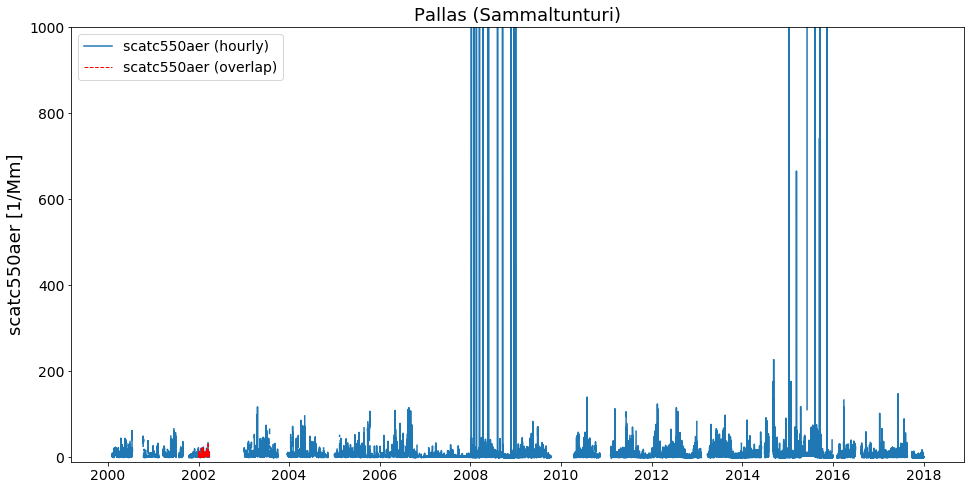

In [3]:
ax = s0.plot_timeseries('scatc550aer', add_overlaps=True)
ax.set_ylim([-10, 1000]);

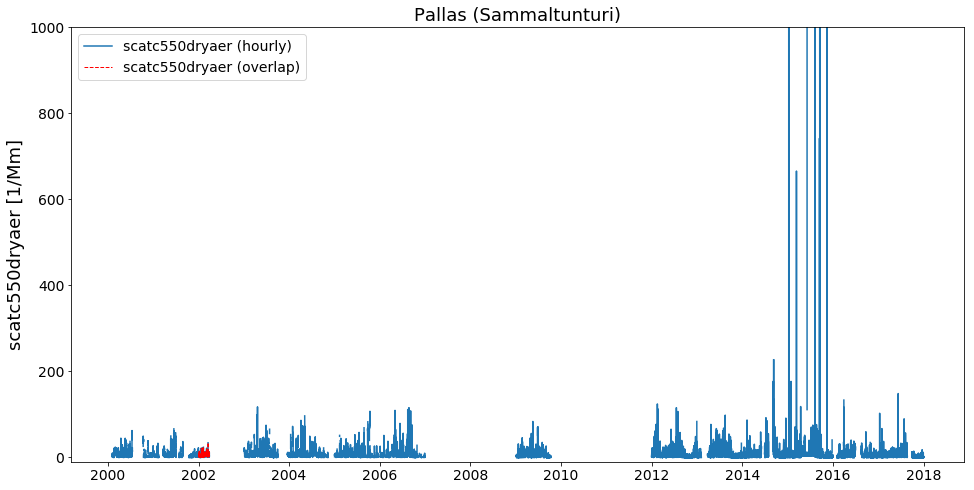

In [4]:
ax = s1.plot_timeseries('scatc550dryaer', add_overlaps=True)
ax.set_ylim([-10, 1000]);

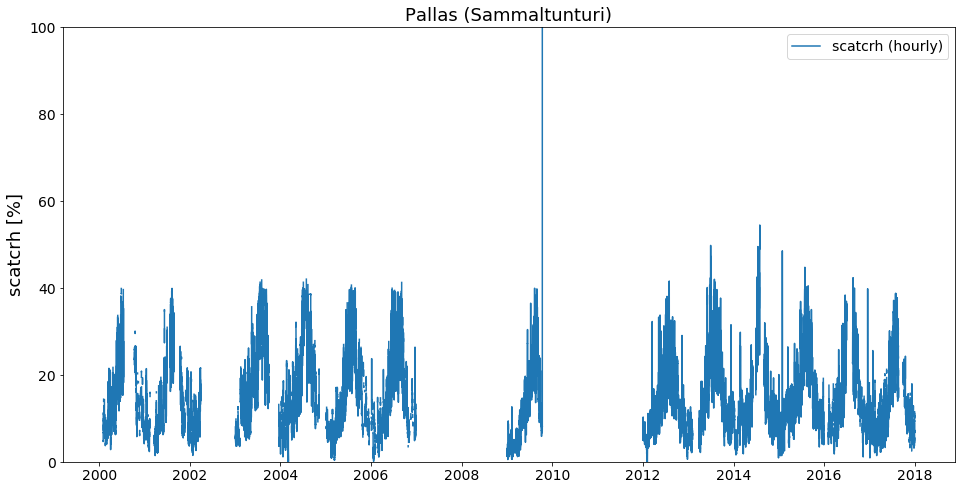

In [5]:
ax = s2.plot_timeseries('scatcrh')
ax.set_ylim([0, 100]);

In [6]:
print(r.opts)


   prefer_statistics (list, 2 items)
   ['arithmetic mean'
    'median']

   ignore_statistics (list, 2 items)
   ['percentile:15.87'
    'percentile:84.13']

   wavelength_tol_nm: 50
   remove_invalid_flags: True
   remove_outliers: False
   keep_aux_vars: True
   log_read_stats: False
   merge_meta: False
   datalevel: 2


In [7]:
r.opts.remove_invalid_flags = True

In [8]:
%timeit r.read_file(r.files[0], vars_to_retrieve=['scatc550dryaer'])

252 ms ± 62.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
r.opts.remove_invalid_flags = False

In [ ]:
%timeit r.read_file(r.files[0], vars_to_retrieve=['scatc550dryaer'])